si vogliono estrarre alcune informazioni dai dataset riguardanti la regione lombardia. In particolare si vogliono avere informazioni su:

1. l'elenco dei comuni con i fiumi che li attraversano (nome comune e nome fiume) 
2. contare per ogni comune il numero di fiumi che li attraversano. Se un comune non è attraversato da un fiume indicare 0
3. elenco delle province con le autostrade che le attraversano. Visualizzare anche le province che non sono attraversate da autostrade.
4. Visualizzare su una mappa i risultati dell'esercizio 3 facendo in modo che le province che non sono attravesate da autostrade siano solo contornate di nero mentre el altre province devono essere colorate a seconda del numero di autostrade che le attraversano.
5. Visualizzare su una mappa i quartieri di Milano e colorarli a seconda del numero di fontanelle presenti.
6. Visualizzare l'elenco dei quartieri di Milano che confinano con comuni fuori Milano. Indicare il nome del quartiere e il nome del comune con cui confina.

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas 
!pip install contextily

     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 15.4 MB 42.9 MB/s 
     |████████████████████████████████| 6.3 MB 56.0 MB/s 
     |████████████████████████████████| 19.3 MB 6.6 MB/s 


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
provincie = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
Corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Corsi_acqua_Piano_di_Gestione")

In [ ]:
regioni

In [ ]:
Corsi_acqua

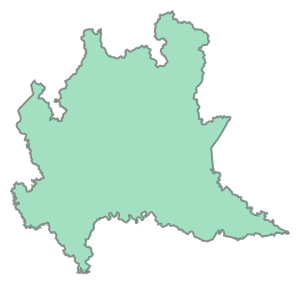

In [ ]:
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"].geometry.squeeze()
lombardia

In [ ]:
comuni_lomba = comuni[comuni.within(lombardia.geometry.squeeze())]

AttributeError: ignored

1. l'elenco dei comuni con i fiumi che li attraversano (nome comune e nome fiume) 

In [ ]:
FiumCom = geopandas.sjoin(Corsi_acqua, comuni, op='intersects', how='left')
FiumCom

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry,index_right,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1907,1,3,15,215,215,15183,015183,Robecchetto con Induno,None,0,16866.384125,1.374867e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1943,1,3,15,215,215,15251,015251,Vermezzo con Zelo,None,0,17174.679422,1.048998e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1861,1,3,15,215,215,15103,015103,Gaggiano,None,0,35500.172635,2.608967e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1927,1,3,15,215,215,15220,015220,Trezzano sul Naviglio,None,0,16835.128614,1.066083e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",1873,1,3,15,215,215,15125,015125,Locate di Triulzi,None,0,19947.580410,1.267902e+07
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",1889,1,3,15,215,215,15159,015159,Opera,None,0,13619.132661,7.595538e+06
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",2464,1,3,18,0,18,18078,018078,Landriano,None,0,17224.849991,1.603567e+07
44,676,IT03N0080981411LO,naturale,Lombardia,Navigliaccio (Colatore),Ticino Sub Lacuale,06SS1N,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,NC,None,NC,None,2014,2014,buono al 2021,buono al 2021,Art. 4.4 per obietti

In [ ]:
FiumCom_rename=FiumCom.rename(columns ={"NOME" : "NOME_FIUME", "COMUNE":"NOME_COMUNE"})[["NOME_COMUNE","NOME_FIUME"]].sort_values(by="NOME_COMUNE").reset_index()
FiumCom_rename

,index,NOME_COMUNE,NOME_FIUME
0,0,Abbiategrasso,Naviglio Grande (Canale)
1,1,Abbiategrasso,Scolmatore Piene Nord - Ovest (Canale)
2,7,Abbiategrasso,Ticino (Fiume)
3,18,Agrate Brianza,Villoresi (Canale)
4,1,Albairate,Scolmatore Piene Nord - Ovest (Canale)
...,...,...,...
238,30,Vigevano,Ticino (Fiume)
239,31,Vimodrone,Naviglio Martesana (Canale)
240,13,Vizzolo Predabissi,Lambro (Fiume)
241,5,Vizzolo Predabissi,Addetta (Colatore)


### 2.contare per ogni comune il numero di fiumi che li attraversano. Se un comune non è attraversato da un fiume indicare 0